<a href="https://colab.research.google.com/github/kvs-1998/BoxOfficePrediction/blob/master/BoxOfficePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kvs1998","key":"286deed3139967e87030f94dccc3bcf3"}'}

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list -s box-office
!kaggle competitions download -c tmdb-box-office-prediction
!ls

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
uciml/glass                                                  Glass Classification                                  3KB  2017-01-27 17:27:48          10997  
kamalchhirang/tmdb-box-office-prediction-more-training-data  TMDB Competition Additional Training Data           531KB  2019-02-21 09:51:24           1463  
mylesoneill/kaggle-movie-league-results                      Kaggle Movie League Results                           3KB  2018-01-02 21:35:43             79  
shiri5h/tweets-bollywood-movie-kabir-singh                   Tweets Bollywood movie Kabir Singh                    1MB  2019-07-06 07:34:55            161  
afzale/rating-vs-gross-collector                          

In [0]:
import pandas as pd
from zipfile import ZipFile
zip_file=ZipFile('train.csv.zip')
train=pd.read_csv(zip_file.open('train.csv'))
zip_file=ZipFile('test.csv.zip')
test=pd.read_csv(zip_file.open('test.csv'))
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Visualizing Target Distribution

In [0]:
len(train.columns)

23

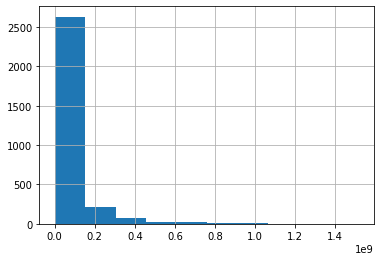

In [0]:
train.revenue.hist()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Distribution of Log transformed revenue')

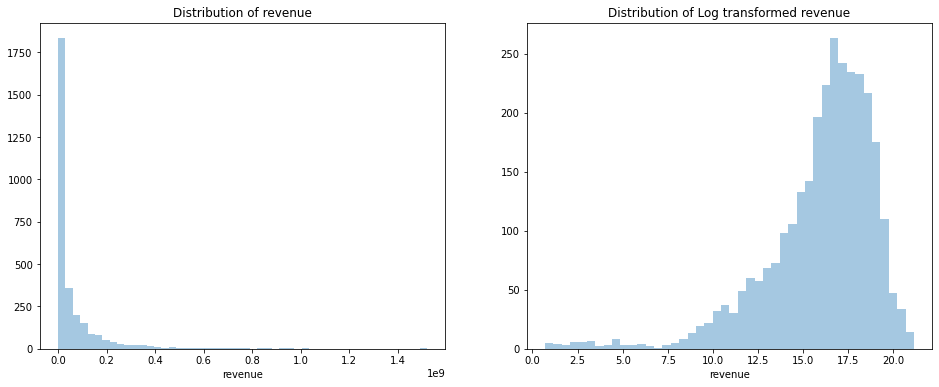

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fig, ax=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train['revenue'],kde=False)
plt.title('Distribution of revenue')
plt.subplot(1,2,2)
sns.distplot(np.log1p(train['revenue']),kde=False)
plt.title('Distribution of Log transformed revenue')

In [0]:
train['log_revenue']=np.log1p(train['revenue'])
train['log_budget']=np.log1p(train['budget'])
test['log_budget']=np.log1p(test['budget'])

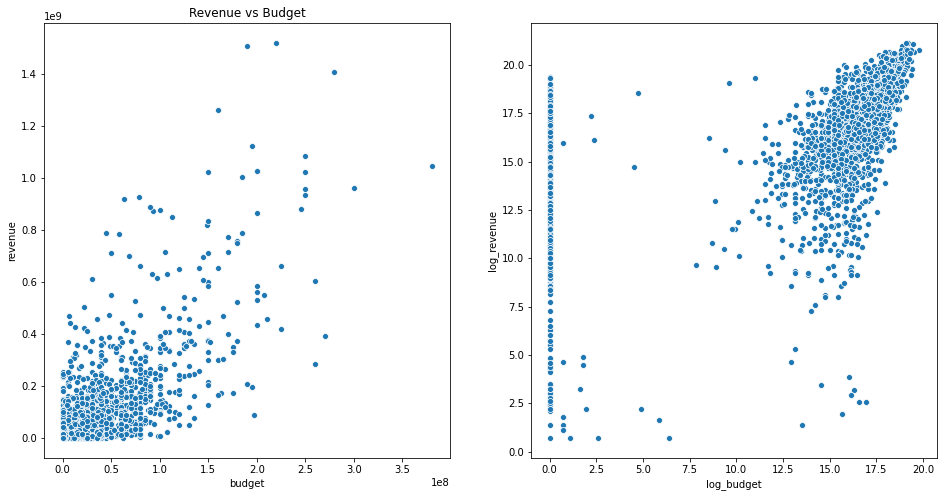

In [0]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(train['budget'],train['revenue'])
plt.title('Revenue vs Budget')
plt.subplot(1,2,2)
sns.scatterplot(train['log_budget'],train['log_revenue'])

## Homepage vs Revenue

In [0]:
train['homepage'].value_counts().head(10)

http://www.transformersmovie.com/           4
http://www.lordoftherings.net/              2
http://www.thehobbit.com/                   2
http://snowdenfilm.com/                     1
http://www.thefastandthefurious3.com/       1
http://sh-sh.ru/                            1
http://trolljegeren.no/                     1
http://www.ringsmovie.com/                  1
http://www.areyousuperbad.com/              1
http://lionsgateathome.com/dirty-dancing    1
Name: homepage, dtype: int64

In [0]:
train['has_homepage']=0
train.loc[train['homepage'].isnull()==False, 'has_homepage'] = 1
test['has_homepage']=0
test.loc[test['homepage'].isnull()==False, 'has_homepage'] = 1

In [0]:
test.has_homepage.head(6)

0    1
1    0
2    0
3    1
4    0
5    0
Name: has_homepage, dtype: int64

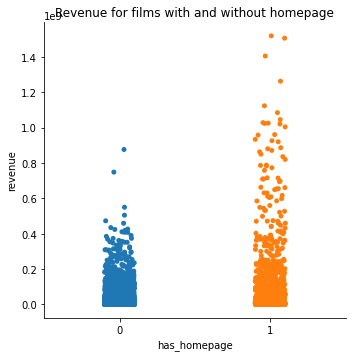

In [0]:
sns.catplot(x='has_homepage',y='revenue',data=train)
plt.title('Revenue for films with and without homepage');

## Distribution of language in film

In [0]:
train['original_language'].value_counts().head(7).index

Index(['en', 'fr', 'ru', 'es', 'hi', 'ja', 'it'], dtype='object')

In [0]:
language_data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

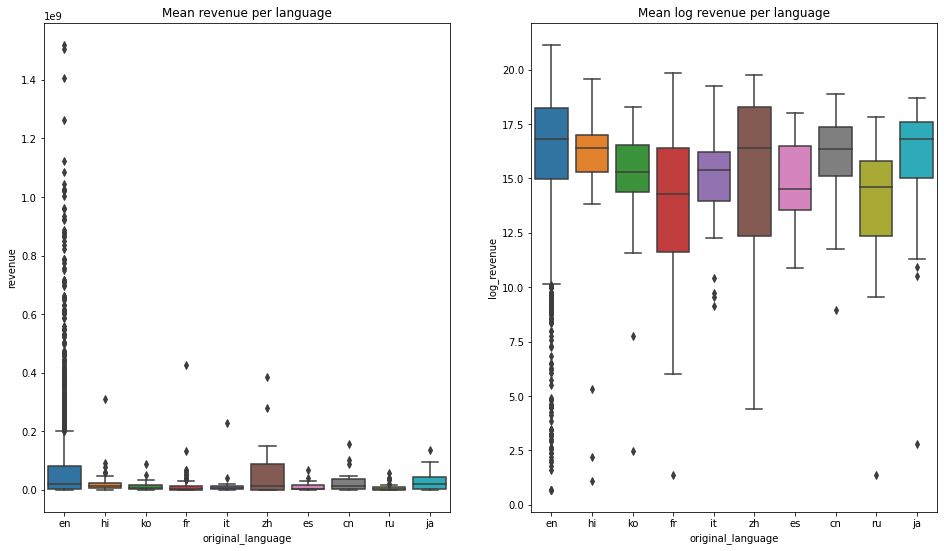

In [0]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.boxplot(x='original_language',y='revenue',data=language_data)
plt.title('Mean revenue per language')
plt.subplot(1,2,2)
sns.boxplot(x='original_language',y='log_revenue',data=language_data)
plt.title('Mean log revenue per language');

In [0]:
y
